In [2]:
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor


13


(-0.5, 127.5, 127.5, -0.5)

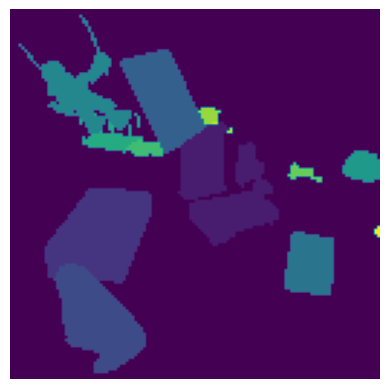

In [3]:
segmentation = np.load('data/MOVIE/segmentations/'+str(0)+'.npy')
print(segmentation[0].max())
plt.imshow(segmentation[0])
plt.axis("off")

In [ ]:
image = np.load('data/MOVIE/videos/'+str(0)+'.npy')
plt.imshow(image[0])
plt.axis("off")

: 

In [ ]:
number_of_videos = 5
extracted_features = 10
model_type = "vit_b"

: 

In [ ]:
sam_checkpoint = "model/"+model_type+".pth"

torch.cuda.set_device(1)
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to("cuda")

mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.86,
    stability_score_thresh=0.92,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100,
)

: 

In [ ]:
def unify_masks(masks):
    uni = np.full(masks[0].shape, False)
    
    for x in masks:
        uni = np.logical_or(uni, x)
    
    return uni

def calc_iou(masks, an):
    uni = unify_masks(masks)
    #an = unify_masks(an)                 # has 3 channels

    uni = uni.squeeze()
    an = an.squeeze()

    intersection = np.logical_and(uni, an)
    union = np.logical_or(uni,an)
    
    return np.sum(intersection)/np.sum(union)

: 

In [ ]:
save_im = 0
save_seg = 0
for i in range(number_of_videos):
    image = np.load('data/MOVIE/videos/'+str(i)+'.npy')
    segmentation = np.load('data/MOVIE/segmentations/'+str(i)+'.npy')

    frameSize = (image.shape[1],image.shape[2])
    iou_av = 0

    for im, seg in zip(image,segmentation):
        masks = mask_generator.generate(im.copy())

        extracted_masks = []
        for i,x in enumerate(masks):
            extracted_masks.append(x)
            if i == extracted_features:
                break

        seg_mask = []
        for x in extracted_masks:
            seg_mask.append(x["segmentation"])
        
        x = calc_iou(seg_mask,seg)
        iou_av += x
        print(x)
 
    print(i,": ",iou_av/image.shape[0])

: 

: 